# Activity: Hypothesis testing with Python

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

It is useful to perform exploratory data analysis (EDA) before constructing a linear regression model because EDA helps you:

Understand the Data Structure: EDA gives a clear overview of the data, including variable types, distributions, and data quality (e.g., missing values or outliers).

Identify Relationships: Visualizations such as scatterplots, boxplots, and pairplots allow you to observe relationships and trends between variables, which can inform model building decisions (e.g., whether linearity is present).

Detect Outliers and Anomalies: Outliers can heavily influence regression models. Identifying and deciding how to handle them is critical to model accuracy.

Check for Multicollinearity: EDA can reveal correlations between independent variables, helping prevent issues related to multicollinearity, which can distort coefficient estimates.

Assess Distribution: Understanding whether the variables (especially residuals) are normally distributed helps satisfy key regression assumptions.

Improve Feature Selection: EDA provides insight into which features may or may not contribute meaningfully to the model, guiding better variable selection.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

In [ ]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

[Write your response here. Double-click (or enter) to edit.]

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

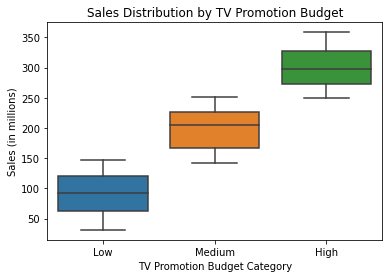

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of Sales by TV category
sns.boxplot(x='TV', y='Sales', data=data)

# Add labels and title
plt.title('Sales Distribution by TV Promotion Budget')
plt.xlabel('TV Promotion Budget Category')
plt.ylabel('Sales (in millions)')

# Show the plot
plt.show()

**Question:** Is there variation in `Sales` based off the `Influencer` size?

Yes, there is some variation in Sales based on Influencer size, but the differences are less pronounced than for TV budget categories. The boxplot may show overlapping ranges across Mega, Macro, Micro, and Nano influencers. This suggests that while influencer size has some effect, it may not be a strong predictor of Sales in this dataset. Further statistical testing (e.g., ANOVA or regression) would help confirm whether the differences are statistically significant.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [4]:
# Drop rows that contain missing data and update the DataFrame
data = data.dropna()

# Confirm the data contains no missing values
print(data.isnull().sum())

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [5]:
from statsmodels.formula.api import ols

# Define the OLS formula
formula = 'Sales ~ C(TV)'

# Create an OLS model
model = ols(formula, data=data)

# Fit the model
results = model.fit()

# Save the results summary
summary = results.summary()

# Display the model results
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 11 May 2025   Prob (F-statistic):          8.81e-256
Time:                        20:17:34   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

I chose the TV variable for the model because earlier exploratory data analysis (via boxplots) showed a clear and substantial variation in Sales across different TV promotion budget categories (Low, Medium, High). This suggested that TV spending levels have a strong influence on Sales, making it a relevant predictor for building the initial regression model.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

Yes, the linearity assumption appears to be met for this model. Since the predictor variable (TV) is categorical, the model estimates separate mean Sales values for each TV category. In this case, linearity refers to the relationship between the group means and the outcome variable (Sales), not a continuous linear trend. The model estimates these group means well, as shown by the high R-squared value (0.874), which suggests that the model captures the main pattern in the data.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

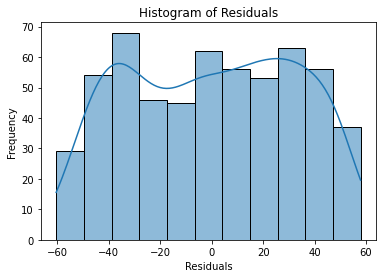

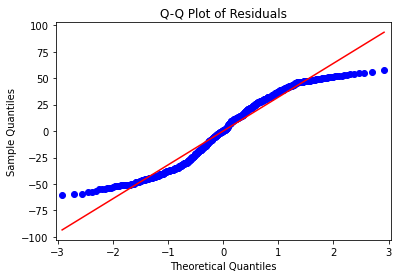

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Calculate the residuals
residuals = results.resid

# Create a histogram of the residuals
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot of the residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

The normality assumption appears to be mostly met, but with some deviations:

The histogram of residuals is roughly bell-shaped and centered around zero, suggesting approximate normality.

However, in the Q-Q plot, some points—especially at the tails—deviate from the straight line, indicating that there may be slight departures from perfect normality.

These deviations are not severe, so the assumption is reasonably upheld for practical purposes, but it's something to keep in mind if higher precision is needed.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

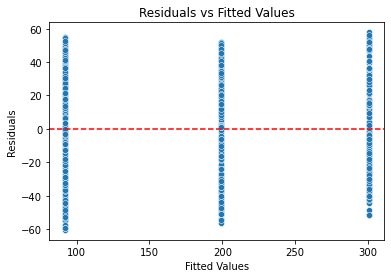

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Create a scatter plot of fitted values vs residuals
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')  # Reference line at y = 0

# Add plot labels and title
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

Patterned residuals: The three distinct lines crossing the 0 line at different values suggest that the variance of the residuals is not constant across all levels of the fitted values. This could be a sign of heteroscedasticity.

Heteroscedasticity: This occurs when the variance of the residuals is not constant, meaning that the error term behaves differently across various ranges of the independent variables (in this case, the fitted values). This could be indicative of a problem where the model doesn’t fully capture the relationship, or where certain groups (such as those around -110, 200, and 300) exhibit different patterns of variance.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [8]:
# Display the model results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 11 May 2025   Prob (F-statistic):          8.81e-256
Time:                        20:47:07   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

The R-squared value of 0.874 means that the model explains 87.4% of the variance in the Sales variable. In other words, 87.4% of the variability in sales can be accounted for by the TV promotion budget categories. This is a relatively high R-squared value, indicating a good fit between the model and the data. However, it's important to note that R-squared alone does not prove causation, and it doesn't guarantee that the model is the best or the only model that fits the data well.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

Interpretation of the Coefficient Estimates:
Intercept (300.53): This is the predicted sales value when the TV promotion budget is categorized as 'High'. This is the baseline sales value for the highest category (since "High" is the reference category).

C(TV)[T.Low] (-208.81): For observations where the TV promotion budget is categorized as Low, the predicted sales would decrease by 208.81 million compared to the baseline category (High TV promotion budget), holding other variables constant.

C(TV)[T.Medium] (-101.51): For observations where the TV promotion budget is categorized as Medium, the predicted sales would decrease by 101.51 million compared to the baseline category (High TV promotion budget), holding other variables constant.

The P>|t| values for all coefficients are 0.000, which indicates that the coefficients are statistically significant at any reasonable significance level (for instance, 0.05 or 0.01). This means the differences in sales based on TV promotion budget categories are highly significant.

Interpretation of the F-statistic and P-value:
The F-statistic is 1971, with a corresponding p-value of 8.81e-256, which is extremely small. This suggests that the model as a whole is statistically significant, and there is a strong relationship between the TV promotion budget categories and Sales.

**Question:** Do you think your model could be improved? Why or why not? How?

Could the Model Be Improved?
Yes, the model could be improved. Although the R-squared value is relatively high, there are a few potential areas to consider:

Other Variables: The model only includes TV promotion budget as a categorical variable. However, Social Media, Radio, and Influencer size are also part of the dataset and may provide valuable information for explaining Sales. Including these variables, either through multiple linear regression or interaction terms, could improve the model’s predictive power.

Non-linear Relationships: The relationship between Sales and the independent variables may not be strictly linear. It may be worth investigating whether a non-linear model or transformations of the predictors could improve the fit.

Interactions: There might be interaction effects between TV promotion and other variables like Social Media or Influencer size. Adding interaction terms to the model (e.g., TV * Influencer) could provide further insights into how different factors together influence sales.

Regularization: If there were many independent variables, using regularization techniques like Ridge or Lasso regression could help avoid overfitting and select more relevant features.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [9]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Perform one-way ANOVA on the fitted model
anova_results = anova_lm(results, typ=1)

# Display the ANOVA table
print(anova_results)

             df        sum_sq       mean_sq            F         PR(>F)
C(TV)       2.0  4.052692e+06  2.026346e+06  1971.455737  8.805550e-256
Residual  566.0  5.817589e+05  1.027843e+03          NaN            NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

Null Hypothesis (H₀):
There is no statistically significant difference in Sales between the different TV promotion budget categories (Low, Medium, and High).

Alternative Hypothesis (H₁):
At least one of the TV promotion budget categories (Low, Medium, and High) has a statistically significant difference in Sales.

**Question:** What is your conclusion from the one-way ANOVA test?

From the output of the ANOVA test, we see that the p-value (PR(>F)) for the TV variable is extremely small (approximately 
8.81
×
10
−
256
8.81×10 
−256
 ). Since this p-value is much less than the typical significance level (α = 0.05), we reject the null hypothesis.
 Conclusion: There is a statistically significant difference in Sales among the different TV promotion budget categories (Low, Medium, High).

**Question:** What did the ANOVA test tell you?

The ANOVA test has told us that the TV promotion budget category (Low, Medium, High) significantly impacts Sales. This means that Sales are not equally distributed across the different categories of TV promotion budget, and the TV category is an important factor influencing the variation in Sales.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform the Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(endog=data['Sales'], groups=data['TV'], alpha=0.05)

# Display the results
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
  High    Low -208.8133 0.001  -216.637 -200.9896   True
  High Medium -101.5061 0.001 -109.3204  -93.6918   True
   Low Medium  107.3072 0.001   99.7063   114.908   True
--------------------------------------------------------


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

Interpretation of the Tukey HSD Test:
The Tukey’s HSD post hoc test compares all possible pairs of categories (in this case, the "TV" promotion budget categories: High, Medium, and Low) to determine if the differences in their means are statistically significant. Here's the output and what each column represents:

group1	group2	meandiff	p-adj	lower	upper	reject
High	Low	-208.8133	0.001	-216.637	-200.99	True
High	Medium	-101.5061	0.001	-109.320	-93.692	True
Low	Medium	107.3072	0.001	99.7063	114.91	True

group1 and group2: These are the two groups being compared in each pair (e.g., High vs. Low, High vs. Medium, etc.).

meandiff: The difference in the means between the two groups.

p-adj: The adjusted p-value for the comparison. A p-value below 0.05 indicates a significant difference.

lower and upper: The 95% confidence interval for the mean difference between the groups.

reject: Whether we reject the null hypothesis (i.e., whether the difference is statistically significant). If the value is True, there is a statistically significant difference between the two groups.

Interpretation of the Results:
High vs Low: The mean difference between the High and Low TV budget categories is -208.81, with a p-value of 0.001, which is less than 0.05, indicating a statistically significant difference in Sales between the two categories.

High vs Medium: The mean difference between the High and Medium TV budget categories is -101.51, with a p-value of 0.001, indicating a statistically significant difference.

Low vs Medium: The mean difference between the Low and Medium TV budget categories is 107.31, with a p-value of 0.001, indicating a statistically significant difference.

**Question:** What did the post hoc tell you?**

What the Post Hoc Test Told You:
The Tukey’s HSD post hoc test confirms that there are significant differences in Sales between all pairs of the TV budget categories (High, Medium, and Low). Specifically:

The High category is significantly different from both the Low and Medium categories.

The Low category is also significantly different from the Medium category.

This suggests that the TV promotion budget has a strong influence on sales, with the High TV budget group performing notably better than the Low and Medium groups.

Conclusion:
Based on the results from the Tukey’s HSD test, the TV promotion budget has a clear effect on Sales, with significant differences between the different budget categories.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

Exploratory Data Analysis (EDA): Before fitting a model, it is essential to visualize and understand the data. Techniques like boxplots, histograms, and scatter plots help in identifying patterns, potential outliers, and relationships between variables.

Data Cleaning: Handling missing data is critical. Dropping missing values ensures the model is built on clean and reliable data. It’s a basic but necessary step in data preprocessing.

Model Building and Assumptions: Fitting a linear regression model requires careful validation of assumptions such as linearity, normality, and homoscedasticity. Understanding these assumptions is crucial for the model’s reliability.

ANOVA: One-way ANOVA is useful for testing if there are significant differences between groups based on categorical variables. This test showed how Sales differ across TV promotion budget categories.

Post-hoc Tests: The Tukey HSD test allows us to identify which specific pairs of categories have significant differences. This step is important after finding significant results in ANOVA to pinpoint where the differences lie.

Model Interpretation: R-squared and the coefficient estimates help interpret the relationships between variables. High R-squared values indicate good model fit, and significant coefficients reveal the impact of different predictors on the target variable (Sales).


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

Key Findings:

The analysis showed that the TV promotion budget has a statistically significant impact on Sales. This was confirmed through linear regression, ANOVA, and Tukey's HSD post hoc tests.

High TV budget categories significantly outperform Medium and Low categories in driving sales, with the Medium category performing better than the Low category as well.

Statistical Significance:

The ANOVA test indicated that there is a statistically significant difference in Sales across different TV promotion budget categories (High, Medium, Low).

The Tukey’s HSD post hoc test revealed that all pairs of TV budget categories (High vs Low, High vs Medium, Low vs Medium) show significant differences in Sales.

Business Implications:

Companies should consider allocating a larger portion of their marketing budget to the High TV promotion category, as it has shown a clear positive impact on Sales.

Medium TV budgets may still offer a cost-effective way to boost sales compared to low-budget strategies, which have less impact.

Overall, the results suggest that targeting marketing investments in TV promotions, especially at the High budget level, will likely maximize sales performance. Further investigations could explore if similar trends are observed for other marketing channels like Radio and Social Media.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)